# Taxi Booking Prediction

## Import Dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data.csv')

df.info()

/home/sourish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sourish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null object
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
dtypes: float64(9), int64(7), object

In [2]:
df.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


## Data Preprocessing

In [3]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


### Removing Null Values

Calculate the percentage of null values in each column

In [4]:
df.isnull().sum() * 100 /len(df)

id                      0.000000
user_id                 0.000000
vehicle_model_id        0.000000
package_id             82.616104
travel_type_id          0.000000
from_area_id            0.202620
to_area_id             21.040271
from_city_id           62.365591
to_city_id             96.343626
from_date               0.000000
to_date                41.191775
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.214133
from_long               0.214133
to_lat                 21.040271
to_long                21.040271
Car_Cancellation        0.000000
dtype: float64

Columns with more than 50% missing data is dropped

In [5]:
df.drop(columns=['package_id', 'to_city_id', 'from_city_id'], inplace=True)

In [6]:
df.isnull().sum() * 100 /len(df)

id                      0.000000
user_id                 0.000000
vehicle_model_id        0.000000
travel_type_id          0.000000
from_area_id            0.202620
to_area_id             21.040271
from_date               0.000000
to_date                41.191775
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.214133
from_long               0.214133
to_lat                 21.040271
to_long                21.040271
Car_Cancellation        0.000000
dtype: float64

Since we are more interested at from where the booking start we can ignore the dropoff location and time

In [7]:
df.drop(columns=['to_lat', 'to_long'], inplace=True)
df.drop(columns=['to_area_id', 'to_date'], inplace=True)

In [8]:
df.isnull().sum()

id                      0
user_id                 0
vehicle_model_id        0
travel_type_id          0
from_area_id           88
from_date               0
online_booking          0
mobile_site_booking     0
booking_created         0
from_lat               93
from_long              93
Car_Cancellation        0
dtype: int64

Converting columns with datetime values to datetime type

In [9]:
df['from_date'] = pd.to_datetime(df['from_date'])
df['booking_created'] = pd.to_datetime(df['booking_created'])

Remove instances with null value from coordinate columns

In [10]:
df.dropna(subset=['from_lat', 'from_long'], inplace=True)
df.isnull().sum()

id                     0
user_id                0
vehicle_model_id       0
travel_type_id         0
from_area_id           0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
Car_Cancellation       0
dtype: int64

Remove features that are irrelevent to our task

In [11]:
df.drop(columns=['id', 'user_id','vehicle_model_id', 'travel_type_id', 'online_booking', 'mobile_site_booking'], inplace=True)

### Clustering the location coordinates

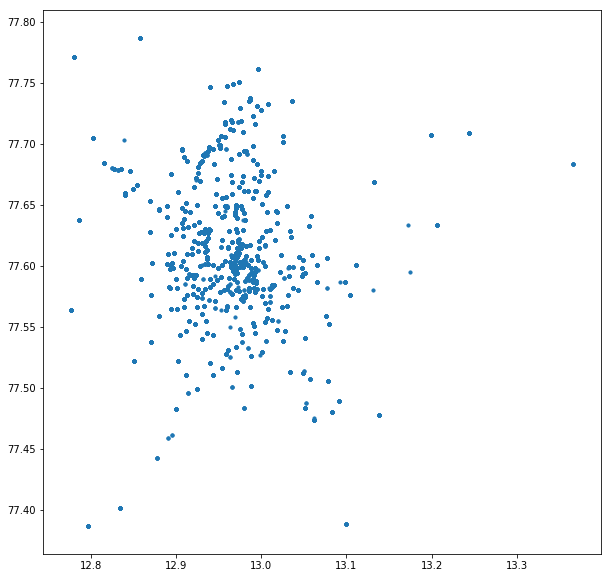

,from_lat,from_long
0,12.924150,77.672290
1,12.966910,77.749350
2,12.937222,77.626915
3,12.989990,77.553320
4,12.845653,77.677925


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(df['from_lat'],df['from_long'], s=10)
plt.show()

loc = pd.DataFrame({
    'from_lat': df['from_lat'],
    'from_long': df['from_long']})
loc.head()

Clustering coordinates to regions

In [13]:
from sklearn.cluster import KMeans

c = KMeans(n_clusters=10).fit_predict(loc)

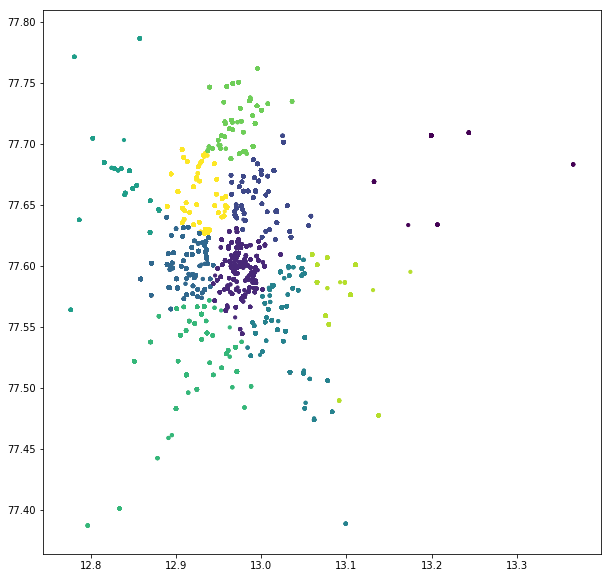

In [14]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(loc['from_lat'],loc['from_long'],s=10, c=c)
plt.show()

In [15]:
len(np.unique(c))

10

In [16]:
len(df.from_area_id.unique())

596

Since the regions are determined using clusters from coordinates, we don't need area id anymore

In [17]:
df.drop(columns=['from_area_id'], inplace=True)

Replacing coordinates with their corresponding clusters

In [18]:
df.drop(columns=['from_date', 'from_lat', 'from_long'], inplace=True)
df['loc'] = c
df.head()

,booking_created,Car_Cancellation,loc
0,2013-01-01 01:39:00,0,9
1,2013-01-01 02:25:00,0,7
2,2013-01-01 03:08:00,0,9
3,2013-01-01 04:39:00,0,4
4,2013-01-01 07:53:00,0,5


A new feature to calculate the number of booking is added

In [19]:
df['Car_Booked'] = 1
df.head()

,booking_created,Car_Cancellation,loc,Car_Booked
0,2013-01-01 01:39:00,0,9,1
1,2013-01-01 02:25:00,0,7,1
2,2013-01-01 03:08:00,0,9,1
3,2013-01-01 04:39:00,0,4,1
4,2013-01-01 07:53:00,0,5,1


### Grouping of bookings

Booking in the same region are grouped together creating 60 minutes time interval bins

In [20]:
data = (df.groupby([pd.Grouper('loc'), pd.Grouper(key='booking_created', freq='60min')])
          .agg({'Car_Cancellation':'sum', 'Car_Booked':'sum'}))
data

Car_Cancellation  Car_Booked
loc booking_created                                  
9   2013-01-01 01:00:00                 0           1
    2013-01-01 03:00:00                 0           1
    2013-01-01 09:00:00                 0           1
    2013-01-01 12:00:00                 0           2
    2013-01-01 20:00:00                 0           1
    2013-01-02 08:00:00                 0           1
    2013-01-02 09:00:00                 0           2
    2013-01-02 10:00:00                 0           2
    2013-01-02 12:00:00                 0           1
    2013-01-02 19:00:00                 0           1
    2013-01-02 20:00:00                 0           1
    2013-01-02 21:00:00                 0           1
    2013-01-03 09:00:00                 0           1
    2013-01-03 13:00:00                 0           1
    2013-01-03 15:00:00                 0           1
    2013-01-03 16:00:00                 0           1
    2013-01-03 20:00:00                 0           1
    2013-01-03 23:00:00                 0           2
    2013-01-04 09:00:00                 0           1
    2013-01-04 14:00:00                 0           2
    2013-01-04 15:00:00                 0           2
    2013-01-04 16:00:00                 0           1
    2013-01-04 17:00:00                 0           1
    2013-01-04 18:00:00                 0           2
    2013-01-04 23:00:00                 0           1
    2013-01-05 10:00:00                 0           1
    2013-01-05 14:00:00                 0           1
    2013-01-05 15:00:00                 0           2
    2013-01-05 16:00:00                 0           1
    2013-01-05 18:00:00                 0           1
...                                   ...         ...
8   2013-11-08 23:00:00                 0           1
    2013-11-09 08:00:00                 0           1
    2013-11-10 00:00:00                 1           1
    2013-11-10 11:00:00                 1           1
    2013-11-11 20:00:00                 0           1
    2013-11-11 21:00:00                 0           1
    2013-11-12 11:00:00                 0           1
    2013-11-12 17:00:00                 0           2
    2013-11-12 20:00:00                 1           1
    2013-11-13 15:00:00                 0           1
    2013-11-13 17:00:00                 1           1
    2013-11-14 11:00:00                 0           1
    2013-11-15 07:00:00                 0           1
    2013-11-15 18:00:00                 0           1
    2013-11-15 22:00:00                 0           1
    2013-11-16 09:00:00                 0           1
    2013-11-16 19:00:00                 1           1
    2013-11-16 20:00:00                 0           1
    2013-11-17 16:00:00                 0           1
    2013-11-17 20:00:00                 0           1
    2013-11-19 17:00:00                 1           1
    2013-11-19 21:00:00                 1           1
    2013-11-20 01:00:00                 1           1
    2013-11-20 09:00:00                 0           1
    2013-11-20 21:00:00                 1           1
    2013-11-21 17:00:00                 0           1
    2013-11-21 21:00:00                 0           1
    2013-11-23 12:00:00                 1           1
    2013-11-23 21:00:00                 0           2
    2013-11-24 14:00:00                 0           1

[27246 rows x 2 columns]

In [21]:
data.sort_values(['booking_created'], ascending=True, inplace=True)
data

,,Car_Cancellation,Car_Booked
loc,booking_created,,
9,2013-01-01 01:00:00,0,1
7,2013-01-01 02:00:00,0,1
9,2013-01-01 03:00:00,0,1
4,2013-01-01 04:00:00,0,1
5,2013-01-01 07:00:00,0,1
4,2013-01-01 08:00:00,0,1
2,2013-01-01 09:00:00,0,2
1,2013-01-01 09:00:00,0,1
7,2013-01-01 09:00:00,0,1
